## modeling with AutoML

In [89]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate


In [90]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [91]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [92]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

In [93]:
eda_forecast

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [94]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

In [95]:
solar_eda.dropna()

,year,month,day,hour,target,date
11,2020,9,10,11,733.260000,2020-09-10 11:00:00
12,2020,9,10,12,645.433333,2020-09-10 12:00:00
13,2020,9,10,13,605.308333,2020-09-10 13:00:00
14,2020,9,10,14,665.733333,2020-09-10 14:00:00
15,2020,9,10,15,522.251667,2020-09-10 15:00:00
...,...,...,...,...,...,...
14347,2022,4,30,19,0.850000,2022-04-30 19:00:00
14348,2022,4,30,20,0.000000,2022-04-30 20:00:00
14349,2022,4,30,21,0.000000,2022-04-30 21:00:00
14350,2022,4,30,22,0.000000,2022-04-30 22:00:00


In [96]:
incheon = real_weather[real_weather['지점명'] =='인천']

In [97]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)

In [98]:
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])

In [99]:
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

eda_weather.drop(['위도','경도'], axis=1, inplace=True)

In [100]:
eda_weather

,일시,기온,풍속,풍향,습도,강수량,hour,month,year
209952,2022-04-10 05:00:00,14.5,3.2,160.0,46.0,0.0,5,4,2022
209953,2022-04-10 00:00:00,15.5,3.9,160.0,42.0,0.0,0,4,2022
209954,2022-04-10 01:00:00,15.4,5.5,180.0,44.0,0.0,1,4,2022
209955,2022-04-10 02:00:00,15.2,4.4,160.0,45.0,0.0,2,4,2022
209956,2022-04-10 03:00:00,15.0,3.5,160.0,44.0,0.0,3,4,2022
...,...,...,...,...,...,...,...,...,...
227443,2022-12-09 01:00:00,3.6,2.3,140.0,59.0,0.0,1,12,2022
227444,2022-12-09 02:00:00,3.2,2.6,140.0,61.0,0.0,2,12,2022
227445,2022-12-08 21:00:00,4.0,1.5,140.0,54.0,0.0,21,12,2022
227446,2022-12-09 03:00:00,3.2,2.8,140.0,60.0,0.0,3,12,2022


In [101]:
eda_weather.set_index('일시', inplace=True)

In [102]:
eda_weather

,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,
2022-04-10 05:00:00,14.5,3.2,160.0,46.0,0.0,5,4,2022
2022-04-10 00:00:00,15.5,3.9,160.0,42.0,0.0,0,4,2022
2022-04-10 01:00:00,15.4,5.5,180.0,44.0,0.0,1,4,2022
2022-04-10 02:00:00,15.2,4.4,160.0,45.0,0.0,2,4,2022
2022-04-10 03:00:00,15.0,3.5,160.0,44.0,0.0,3,4,2022
...,...,...,...,...,...,...,...,...
2022-12-09 01:00:00,3.6,2.3,140.0,59.0,0.0,1,12,2022
2022-12-09 02:00:00,3.2,2.6,140.0,61.0,0.0,2,12,2022
2022-12-08 21:00:00,4.0,1.5,140.0,54.0,0.0,21,12,2022


In [103]:
solar_eda.set_index('date', inplace=True)

In [104]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [105]:
total_time

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00',
               '2022-04-30 18:00:00', '2022-04-30 19:00:00',
               '2022-04-30 20:00:00', '2022-04-30 21:00:00',
               '2022-04-30 22:00:00', '2022-04-30 23:00:00'],
              dtype='datetime64[ns]', length=11640, freq='H')

y = solar_eda.loc[total_time].target

In [106]:
solar_2.date = pd.to_datetime(solar_2.date)

In [107]:
solar_2.set_index('date', inplace=True)

In [108]:
y = solar_2.loc[total_time].value

In [109]:
y_input = y.loc[('2022-01-14 00:00:00' > y.index) | (y.index > '2022-01-17 23:00:00')]

In [110]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [111]:
x_input = x.loc[('2022-01-14 00:00:00' > x.index) | (x.index > '2022-01-17 23:00:00')]

In [112]:
x

,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,
2022-04-10 05:00:00,14.5,3.2,160.0,46.0,0.0,5,4,2022
2022-04-10 00:00:00,15.5,3.9,160.0,42.0,0.0,0,4,2022
2022-04-10 01:00:00,15.4,5.5,180.0,44.0,0.0,1,4,2022
2022-04-10 02:00:00,15.2,4.4,160.0,45.0,0.0,2,4,2022
2022-04-10 03:00:00,15.0,3.5,160.0,44.0,0.0,3,4,2022
...,...,...,...,...,...,...,...,...
2021-06-02 01:00:00,18.1,2.5,20.0,85.0,0.0,1,6,2021
2021-06-02 00:00:00,18.5,3.3,340.0,84.0,0.0,0,6,2021
2021-06-01 23:00:00,19.7,1.8,90.0,68.0,0.0,23,6,2021


In [113]:
y

2021-01-01 00:00:00      0.0
2021-01-01 01:00:00      0.0
2021-01-01 02:00:00      0.0
2021-01-01 03:00:00      0.0
2021-01-01 04:00:00      0.0
                       ...  
2022-04-30 19:00:00    144.0
2022-04-30 20:00:00      0.0
2022-04-30 21:00:00      0.0
2022-04-30 22:00:00      0.0
2022-04-30 23:00:00      0.0
Name: value, Length: 11640, dtype: float64

In [114]:
comm = y.index.intersection(x.index)

In [115]:
x = x.loc[comm]

In [116]:
y = y.loc[comm]

In [117]:
slice = round(len(x) * 0.75)

In [118]:
x_train = x_input.iloc[:slice]
x_test = x_input.iloc[slice:]
y_train = y_input.iloc[:slice]
y_test = y_input.iloc[slice:]

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [120]:
sc = StandardScaler()

In [121]:
mn = MinMaxScaler()

In [122]:
sc_x = mn.fit_transform(x)

In [123]:
sc_y = mn.fit_transform(y.values.reshape(-1,1))
sc_y_ = sc_y.reshape(-1)

In [124]:
sc_x_train = sc_x[:slice]
sc_x_test = sc_x[slice:]
sc_y_train = sc_y_[:slice]
sc_y_test = sc_y_[slice:]

In [125]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

8729 2814 8729 2815


In [126]:
from pycaret.regression import *

In [127]:
reg = setup(data = sc_x_train, 
            target = sc_y_train,
            fold=5)

,Description,Value
0,Session id,2327
1,Target,target
2,Target type,Regression
3,Original data shape,"(8729, 9)"
4,Transformed data shape,"(8729, 9)"
5,Transformed train set shape,"(6110, 9)"
6,Transformed test set shape,"(2619, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [128]:
best_model = compare_models(sort='RMSE', n_select=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:56:40
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


In [129]:
model_results = pull()

In [130]:
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0590,0.0124,0.1112,0.8278,0.0814,2.7227,0.302
rf,Random Forest Regressor,0.0568,0.0129,0.1137,0.8200,0.0830,1.5292,0.520
xgboost,Extreme Gradient Boosting,0.0655,0.0133,0.1151,0.8156,0.0847,3.0763,0.400
et,Extra Trees Regressor,0.0585,0.0137,0.1170,0.8094,0.0854,1.7043,0.424
gbr,Gradient Boosting Regressor,0.0732,0.0147,0.1211,0.7957,0.0896,4.0168,0.436
knn,K Neighbors Regressor,0.0699,0.0164,0.1280,0.7719,0.0945,4.4113,0.234
ada,AdaBoost Regressor,0.0822,0.0190,0.1377,0.7359,0.0989,3.7888,0.276
dt,Decision Tree Regressor,0.0711,0.0241,0.1549,0.6653,0.1132,1.4395,0.228
ridge,Ridge Regression,0.1880,0.0583,0.2415,0.1883,0.1836,16.4237,0.792
lar,Least Angle Regression,0.1880,0.0583,0.2415,0.1882,0.1836,16.4012,0.226


In [131]:
best_model

[LGBMRegressor(random_state=2327),
 RandomForestRegressor(n_jobs=-1, random_state=2327),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=2327, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=2327),
 GradientBoostingRegressor(random_state=2327),
 KNeighborsRegressor(n_jobs=-1),
 AdaBoostRegressor(rando

In [132]:
lgbr = create_model('lightgbm')
rf = create_model('rf')
extra = create_model('et')
gradient = create_model('gbr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:57:40
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0597,0.0127,0.1127,0.8206,0.0825,2.5745
1,0.0614,0.0137,0.1169,0.8157,0.0851,4.6875
2,0.0572,0.0119,0.1091,0.8359,0.0810,2.4238
3,0.0582,0.0121,0.1099,0.8363,0.0790,1.7628
4,0.0584,0.0115,0.1074,0.8306,0.0793,2.1647
Mean,0.0590,0.0124,0.1112,0.8278,0.0814,2.7227
Std,0.0015,0.0007,0.0033,0.0083,0.0022,1.0203


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:57:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0575,0.0134,0.1157,0.8109,0.0848,1.3707
1,0.0602,0.0145,0.1204,0.8046,0.0874,2.1722
2,0.0558,0.0124,0.1114,0.8289,0.0823,1.1951
3,0.0556,0.0127,0.1127,0.8280,0.0808,1.4243
4,0.0549,0.0117,0.1084,0.8274,0.0798,1.4838
Mean,0.0568,0.0129,0.1137,0.8200,0.0830,1.5292
Std,0.0019,0.0009,0.0041,0.0102,0.0028,0.3356


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:57:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0593,0.0139,0.1179,0.8036,0.0866,1.5257
1,0.0618,0.0150,0.1225,0.7974,0.0890,2.6074
2,0.0575,0.0137,0.1170,0.8112,0.0861,1.2976
3,0.0568,0.0132,0.1150,0.8207,0.0827,1.4970
4,0.0572,0.0127,0.1125,0.8140,0.0828,1.5938
Mean,0.0585,0.0137,0.1170,0.8094,0.0854,1.7043
Std,0.0019,0.0008,0.0033,0.0081,0.0024,0.4622


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0593,0.0139,0.1179,0.8036,0.0866,1.5257
1,0.0618,0.0150,0.1225,0.7974,0.0890,2.6074
2,0.0575,0.0137,0.1170,0.8112,0.0861,1.2976
3,0.0568,0.0132,0.1150,0.8207,0.0827,1.4970
4,0.0572,0.0127,0.1125,0.8140,0.0828,1.5938
Mean,0.0585,0.0137,0.1170,0.8094,0.0854,1.7043
Std,0.0019,0.0008,0.0033,0.0081,0.0024,0.4622


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:57:47
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0746,0.0154,0.1242,0.7822,0.0922,3.2538
1,0.0739,0.0155,0.1246,0.7905,0.0913,6.4713
2,0.0727,0.0144,0.1198,0.8019,0.0892,2.7183
3,0.0728,0.0141,0.1186,0.8093,0.0872,4.5411
4,0.0719,0.0140,0.1183,0.7946,0.0880,3.0999
Mean,0.0732,0.0147,0.1211,0.7957,0.0896,4.0168
Std,0.0010,0.0007,0.0027,0.0093,0.0019,1.3717


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [133]:
lgbr_best = tune_model(lgbr)
rf_best = tune_model(rf)
extra_best = tune_model(extra)
gradient_best = tune_model(gradient)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:57:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0797,0.0161,0.1269,0.7726,0.0943,2.7229
1,0.0791,0.0162,0.1272,0.7817,0.0934,7.3564
2,0.0759,0.0150,0.1224,0.7934,0.0911,2.7294
3,0.0785,0.0159,0.1260,0.7851,0.0920,5.6214
4,0.0791,0.0155,0.1246,0.7719,0.0930,3.4728
Mean,0.0784,0.0157,0.1254,0.7809,0.0928,4.3806
Std,0.0013,0.0004,0.0018,0.0081,0.0011,1.8272


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0797,0.0161,0.1269,0.7726,0.0943,2.7229
1,0.0791,0.0162,0.1272,0.7817,0.0934,7.3564
2,0.0759,0.0150,0.1224,0.7934,0.0911,2.7294
3,0.0785,0.0159,0.1260,0.7851,0.0920,5.6214
4,0.0791,0.0155,0.1246,0.7719,0.0930,3.4728
Mean,0.0784,0.0157,0.1254,0.7809,0.0928,4.3806
Std,0.0013,0.0004,0.0018,0.0081,0.0011,1.8272


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:58:10
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0668,0.0150,0.1225,0.7882,0.0905,2.4581
1,0.0656,0.0151,0.1229,0.7961,0.0903,7.7481
2,0.0625,0.0134,0.1160,0.8145,0.0863,1.9441
3,0.0639,0.0143,0.1197,0.8058,0.0873,2.3596
4,0.0648,0.0137,0.1171,0.7987,0.0869,3.2183
Mean,0.0647,0.0143,0.1196,0.8007,0.0883,3.5457
Std,0.0015,0.0007,0.0028,0.0089,0.0018,2.1411


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:59:40
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0770,0.0170,0.1304,0.7598,0.0964,3.5393
1,0.0743,0.0167,0.1293,0.7744,0.0946,7.2507
2,0.0724,0.0156,0.1250,0.7844,0.0925,2.8201
3,0.0726,0.0156,0.1251,0.7881,0.0908,3.5021
4,0.0732,0.0155,0.1246,0.7719,0.0922,3.4506
Mean,0.0739,0.0161,0.1269,0.7757,0.0933,4.1126
Std,0.0017,0.0006,0.0025,0.0100,0.0020,1.5911


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:00:35
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0596,0.0128,0.1132,0.8192,0.0831,1.8110
1,0.0626,0.0145,0.1204,0.8045,0.0874,4.2864
2,0.0584,0.0123,0.1107,0.8309,0.0819,1.5832
3,0.0583,0.0124,0.1113,0.8321,0.0803,2.4632
4,0.0585,0.0118,0.1085,0.8270,0.0799,2.3220
Mean,0.0595,0.0127,0.1128,0.8227,0.0825,2.4932
Std,0.0016,0.0009,0.0041,0.0102,0.0027,0.9528


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0596,0.0128,0.1132,0.8192,0.0831,1.8110
1,0.0626,0.0145,0.1204,0.8045,0.0874,4.2864
2,0.0584,0.0123,0.1107,0.8309,0.0819,1.5832
3,0.0583,0.0124,0.1113,0.8321,0.0803,2.4632
4,0.0585,0.0118,0.1085,0.8270,0.0799,2.3220
Mean,0.0595,0.0127,0.1128,0.8227,0.0825,2.4932
Std,0.0016,0.0009,0.0041,0.0102,0.0027,0.9528


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [134]:
model_list = [lgbr_best, rf_best, extra_best, gradient_best]

In [135]:
blended = blend_models(estimator_list = model_list,
                       fold = 5,
                       optimize='MSE',
                       )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:01:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0578,0.0127,0.1127,0.8207,0.0827,1.7033
1,0.0602,0.0139,0.1177,0.8131,0.0856,3.3208
2,0.0559,0.0121,0.1098,0.8338,0.0813,1.5864
3,0.0557,0.0121,0.1099,0.8364,0.0790,1.7266
4,0.0559,0.0115,0.1070,0.8318,0.0788,1.8131
Mean,0.0571,0.0124,0.1114,0.8272,0.0815,2.0300
Std,0.0017,0.0008,0.0036,0.0088,0.0025,0.6494


In [136]:
final_model = finalize_model(blended)

In [137]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['feature_1', 'feature_2',
                                             'feature_3', 'feature_4',
                                             'feature_5', 'feature_6',
                                             'feature_7', 'feature_8'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='m...
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=2327)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=2327)),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(max_depth=9,
                                                                        max_features=1.0,
                                                                        min_impurity_decrease=0.05,
                                                                        min_samples_leaf=2,
                                                                        min_samples_split=9,
                                                                        n_estimators=110,
                                                                        random_state=2327,
                                                                        subsample=0.7))],
                                 n_jobs=-1))])

In [143]:
final_result = predict_model(final_model, data=pd.DataFrame(sc_x_test, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']))

In [162]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [156]:
final_result.prediction_label

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,prediction_label
0,0.304854,0.201613,0.805556,0.517241,0.0,0.739130,1.000000,0.0,0.090729
1,0.299029,0.435484,0.888889,0.597701,0.0,0.782609,1.000000,0.0,0.005382
2,0.289320,0.467742,0.888889,0.482759,0.0,0.826087,1.000000,0.0,-0.000960
3,0.267961,0.556452,0.888889,0.471264,0.0,0.869565,1.000000,0.0,-0.000204
4,0.262136,0.564516,0.805556,0.425287,0.0,0.913043,1.000000,0.0,-0.000238
...,...,...,...,...,...,...,...,...,...
2905,0.559223,0.250000,0.694444,0.781609,0.0,0.826087,0.272727,1.0,0.021464
2906,0.549515,0.274194,0.750000,0.804598,0.0,0.869565,0.272727,1.0,0.003144
2907,0.547573,0.193548,0.750000,0.850575,0.0,0.913043,0.272727,1.0,0.002265
2908,0.547573,0.217742,0.750000,0.850575,0.0,0.956522,0.272727,1.0,0.002334


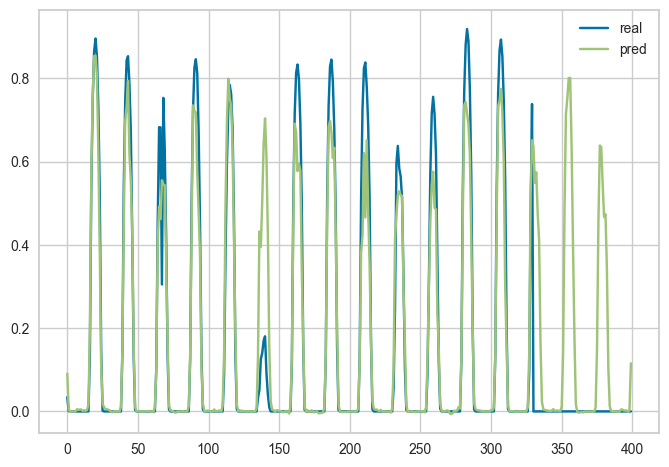

In [168]:
plt.plot(sc_y_test[:400], label='real')
plt.plot(final_result.prediction_label[:400], label='pred')
plt.legend()
plt.show()

In [169]:
lig_result = predict_model(lgbr_best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0596,0.0120,0.1096,0.8349,0.0811,1.9408


In [170]:
evaluate_model(lgbr_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lig_result

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
4,0.186408,0.153226,0.194444,0.551724,0.0,0.173913,0.000000,0.0,0.000000,-0.002936
5,0.186408,0.250000,0.555556,0.597701,0.0,0.217391,0.000000,0.0,0.000000,-0.001667
14,0.363107,0.145161,0.638889,0.505747,0.0,0.608696,0.000000,0.0,0.446055,0.576387
15,0.355340,0.161290,0.638889,0.574713,0.0,0.652174,0.000000,0.0,0.373571,0.561816
16,0.333981,0.161290,0.638889,0.655172,0.0,0.695652,0.000000,0.0,0.128427,0.336441
...,...,...,...,...,...,...,...,...,...,...
11619,0.559223,0.080645,0.305556,0.586207,0.0,0.173913,0.272727,1.0,0.000000,0.002140
11628,0.650485,0.201613,0.638889,0.632184,0.0,0.565217,0.272727,1.0,0.568627,0.736245
11632,0.570874,0.524194,0.694444,0.712644,0.0,0.739130,0.272727,1.0,0.224793,0.318757
11636,0.547573,0.193548,0.750000,0.850575,0.0,0.913043,0.272727,1.0,0.000000,0.008539


lig_result[['target','prediction_label']].iloc[250:300,:].plot()